In [4]:
import pandas as pd
df=pd.read_csv('C:/Users/jaag1/Documents/customer segmentation.csv')
df.head(7)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0


In [6]:
print(df.info())
print(df.describe())

# Handle missing values (example: drop rows with missing values)
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [8]:
# Calculate key metrics
average_purchase_value = df['MntTotal'].mean()
purchase_frequency = df['AcceptedCmpOverall'].mean()

print(f"Average Purchase Value: {average_purchase_value}")
print(f"Purchase Frequency: {purchase_frequency}")


Average Purchase Value: 562.7646258503402
Purchase Frequency: 0.29931972789115646


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Display basic information about the dataset
print(df.info())

# Handle missing values (example: drop rows with missing values)
df = df.dropna()

# Ensure relevant columns are numeric
features = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
               'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
               'MntSweetProducts', 'MntGoldProds', 'MntTotal', 
               'MntRegularProds', 'AcceptedCmpOverall']].apply(pd.to_numeric)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df.head())  # Print the first few rows to verify the clustering results


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

C:\Users\jaag1\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jaag1\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jaag1\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jaag1\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jaag1\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduation  \
0         

C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


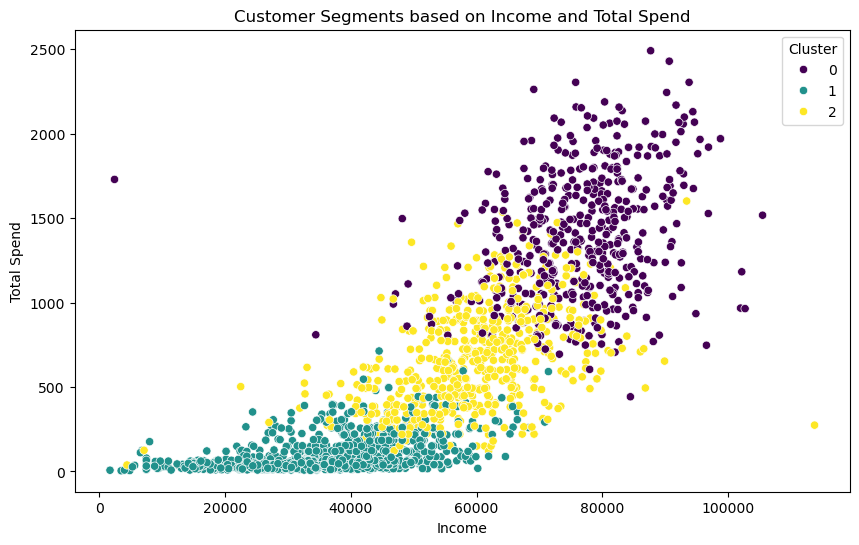

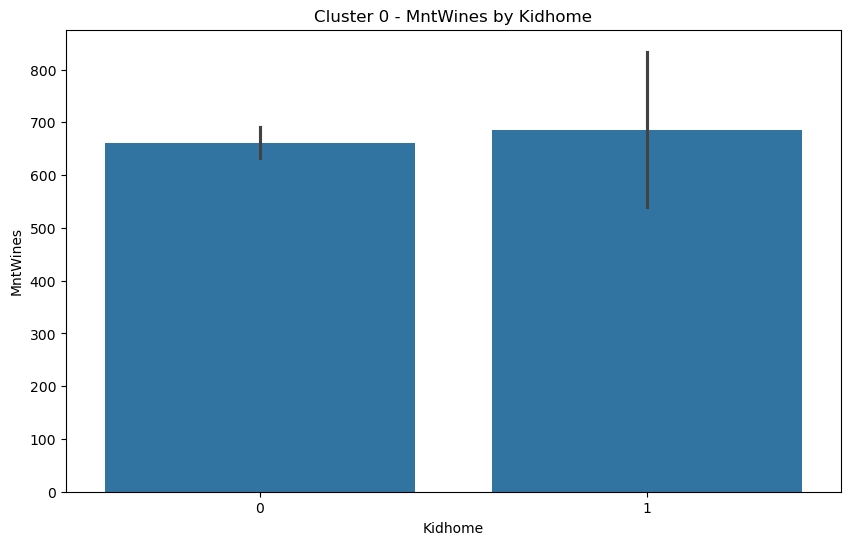

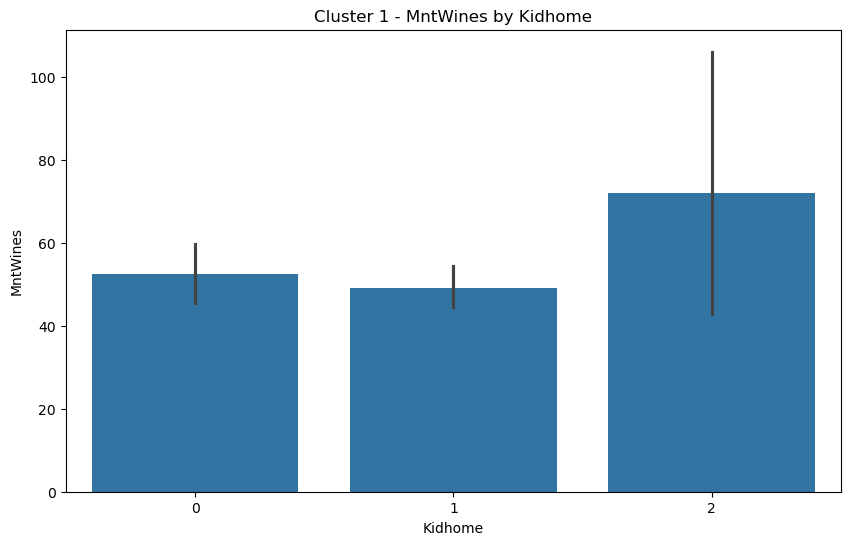

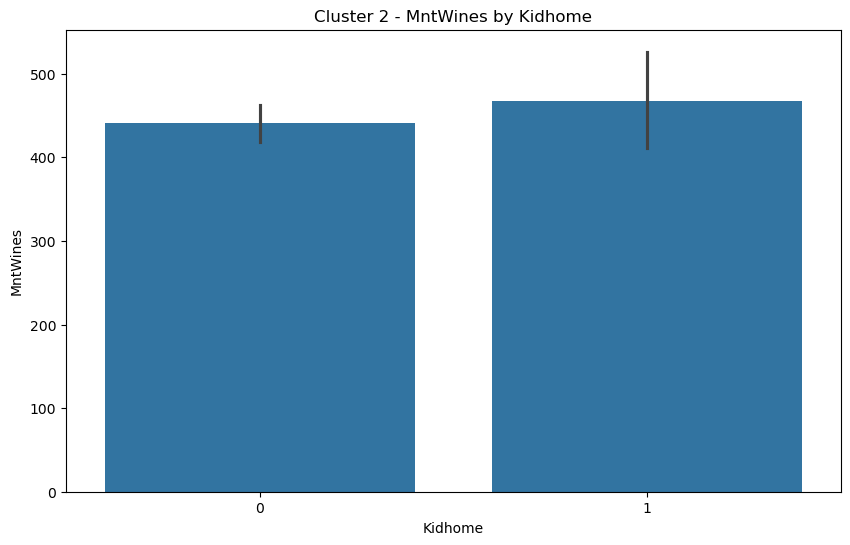

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to illustrate customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments based on Income and Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

# Bar chart for each segment
for cluster in df['Cluster'].unique():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Kidhome', y='MntWines', data=df[df['Cluster'] == cluster])
    plt.title(f'Cluster {cluster} - MntWines by Kidhome')
    plt.xlabel('Kidhome')
    plt.ylabel('MntWines')
    plt.show()


In [14]:
# Analyze characteristics of each segment and provide insights
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster} Characteristics:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 0 Characteristics:
              Income     Kidhome    Teenhome     Recency     MntWines  \
count     518.000000  518.000000  518.000000  518.000000   518.000000   
mean    76394.714286    0.052124    0.185328   49.629344   662.349421   
std     10071.023312    0.222491    0.403583   29.359666   324.873729   
min      2447.000000    0.000000    0.000000    0.000000     1.000000   
25%     70377.000000    0.000000    0.000000   25.000000   398.250000   
50%     77017.500000    0.000000    0.000000   52.500000   608.000000   
75%     82416.250000    0.000000    0.000000   74.750000   906.250000   
max    105471.000000    1.000000    2.000000   99.000000  1493.000000   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  518.00000       518.000000       518.000000        518.000000   
mean    71.30695       474.880309       106.131274         74.113900   
std     51.48781       228.436137        66.730282         51.892171   
min      0.00000        98.